# PIML implementation with Harmonic oscillator

Author: Thanh Nguyen
Date: 25 Aug 2024

# To set up the environment

You will need a the files: (1) `.python-version`, (2) `Pipfile`
You will need to install pipenv and pyenv

`cd` into the project and run `pipenv install`

That's all, have fun

In [7]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from data import harmonic_oscillator_solution

# The Problem

We are modelling the motion of **Harmonic Oscillator** in time, which physically described as the differential equation:

$$
m \dfrac{d^2 x}{d t^2} + \mu \dfrac{d x}{d t} + kx = 0~,
$$

Specifically we are focusing the **underdapmed state**, in which the socillation is slowly damped by friction, i.e. the height differences smaller with time.

Mathematically:
$$
\delta < \omega_0
$$
where: 
- $x$ is the displacement
- $m$ is the mass of the oscillator
- $\omega_0 = \sqrt(\frac{k}{m})$ is the undamped angular frequency of the oscillator, and $k$ is the spring constant.
- $\delta = \dfrac{\mu}{2m}$ is damping ratio, larger $\delta$ cause the oscilator returns to equilibrium more slowly.
- $\mu$ is viscous damping coefficient

We consider the initial condition:
$$
x(t=0) = 1~~,~~\dfrac{d x}{d t}(t=0) = 0~.
$$

After a lot of computation that I did not do, A solution to the differential equation for this case is:
$$
x(t) = e^{-\delta t}(2 A \cos(\phi + \omega t))~,~~~~~\mathrm{with}~~\omega=\sqrt{\omega_0^2 - \delta^2}~.
$$
where:
- $A = \frac{1}{2 cos(\phi)}$ is amplitude
- $\phi = tan^-1(\frac{-d}{\omega})$ is the phase angle

see: 
- https://en.wikipedia.org/wiki/Harmonic_oscillator
- https://beltoforion.de/en/harmonic_oscillator/, eqn (26)


Anyway we go blasting.

In [9]:
# Some noisy data to simulate observational error
torch.manual_seed(123)
d, w0 = 2, 20
print(f"True value of mu: {2*d}")
t_obs = torch.linspace(0,1,300).view(-1,1)
x_obs = harmonic_oscillator_solution(d, w0, t_obs) + 0.04*torch.randn_like(t_obs)

True value of mu: 4


In [10]:
# save as a dataset
import pandas as pd

df = pd.DataFrame(torch.cat((t_obs, x_obs), 1)).astype('float').sort_values(0)
df.columns = ['t', 'observation']
df.reindex(np.arange(len(df.index)))

df.to_csv('time-oscillation.csv', index=False)


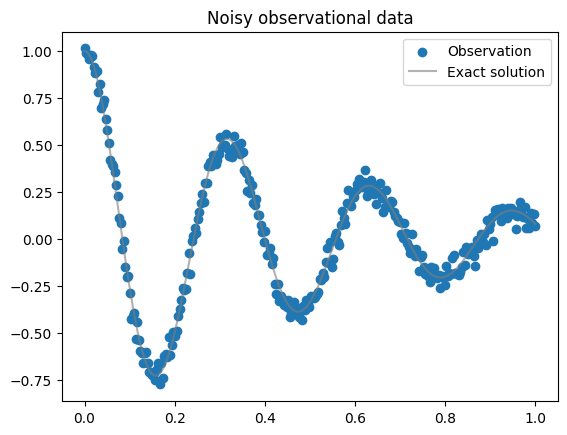

In [11]:
plt.figure()
plt.title("Noisy observational data")
plt.scatter(t_obs[:,0], x_obs[:,0], label="Observation")
t_test = torch.linspace(0,1,500).view(-1,1)
x_exact = harmonic_oscillator_solution(d, w0, t_test)
plt.plot(t_test[:,0], x_exact[:,0], label="Exact solution", color="tab:grey", alpha=0.6)
plt.legend()
plt.show()